Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist


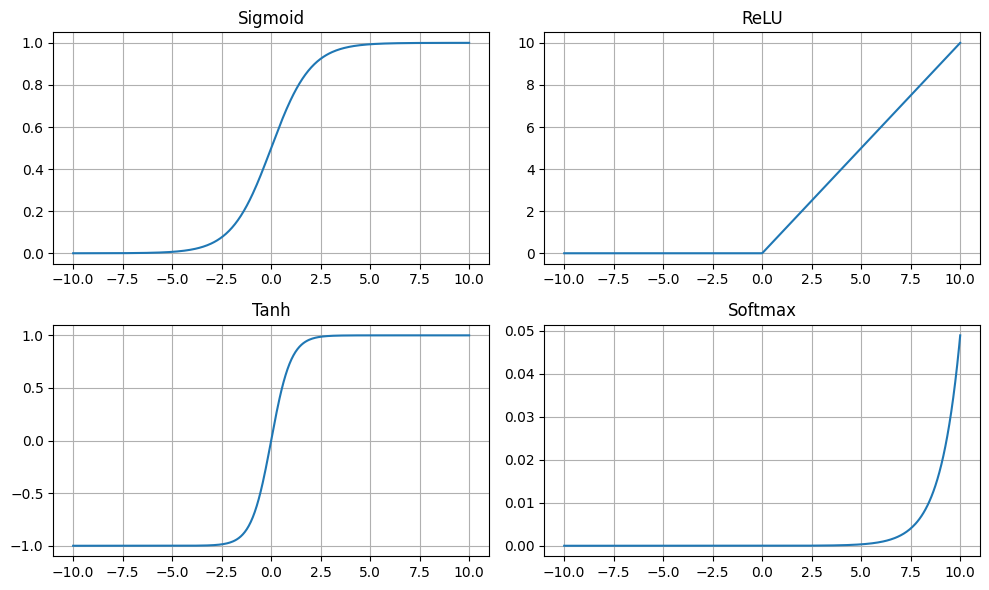

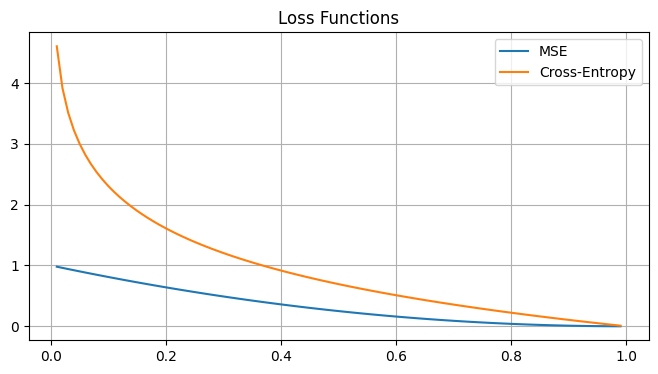


Training with SGD optimizer...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1892 - loss: 2.2324 - val_accuracy: 0.4504 - val_loss: 1.8688
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5078 - loss: 1.7693 - val_accuracy: 0.5612 - val_loss: 1.5249
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5866 - loss: 1.4509 - val_accuracy: 0.6289 - val_loss: 1.2735
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6456 - loss: 1.2094 - val_accuracy: 0.6501 - val_loss: 1.1107
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6581 - loss: 1.0805 - val_accuracy: 0.6718 - val_loss: 0.9992

Training with SGD+Momentum optimizer...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3320 - loss: 1.9364 - val_accuracy: 0.6806 - val_loss: 0.9432
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6760 - loss: 0.8529 - val_accuracy: 0.7492 - val_loss: 0.7120
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7533 - loss: 0.6788 - val_ac

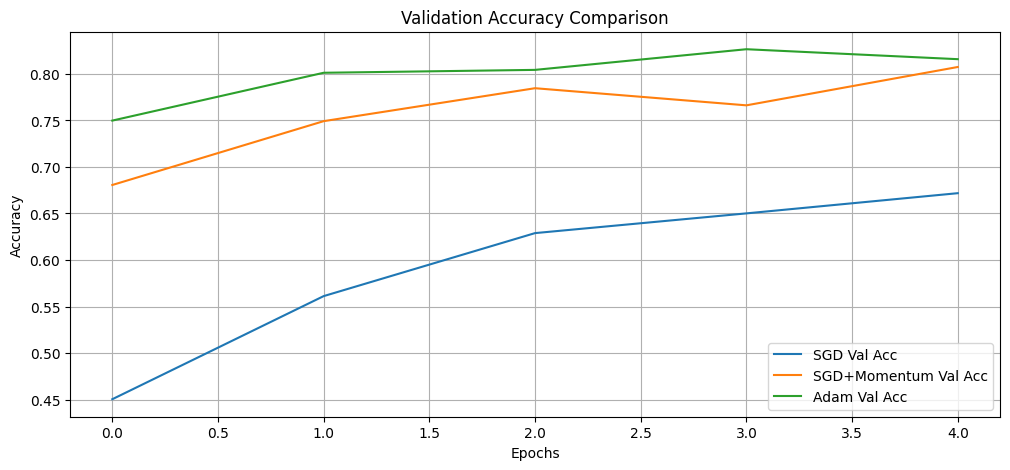

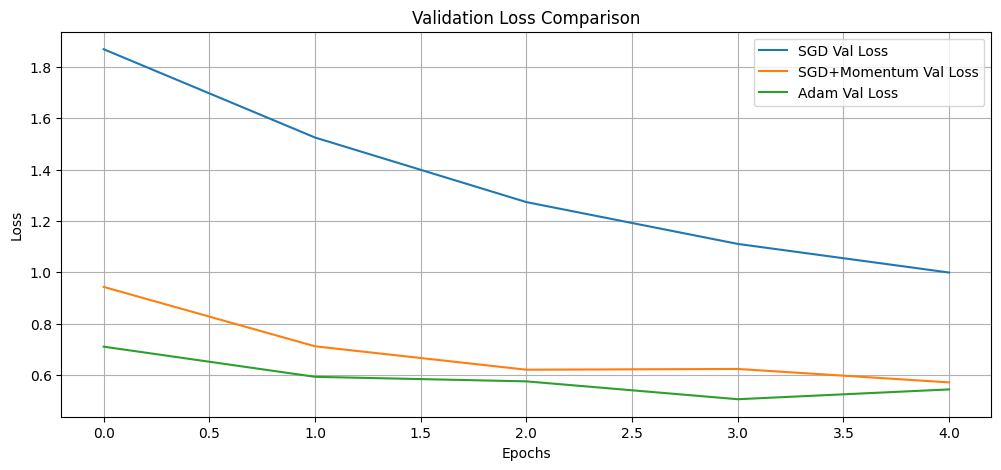

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


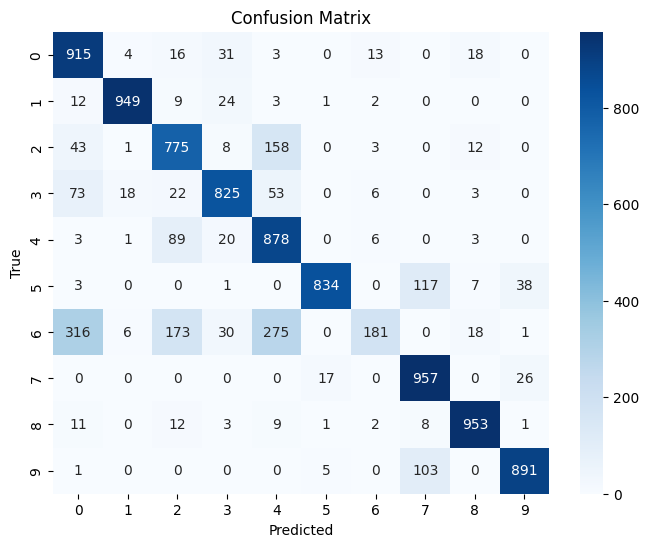


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.78      0.74      1000
           3       0.88      0.82      0.85      1000
           4       0.64      0.88      0.74      1000
           5       0.97      0.83      0.90      1000
           6       0.85      0.18      0.30      1000
           7       0.81      0.96      0.88      1000
           8       0.94      0.95      0.95      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.80     10000
weighted avg       0.84      0.82      0.80     10000



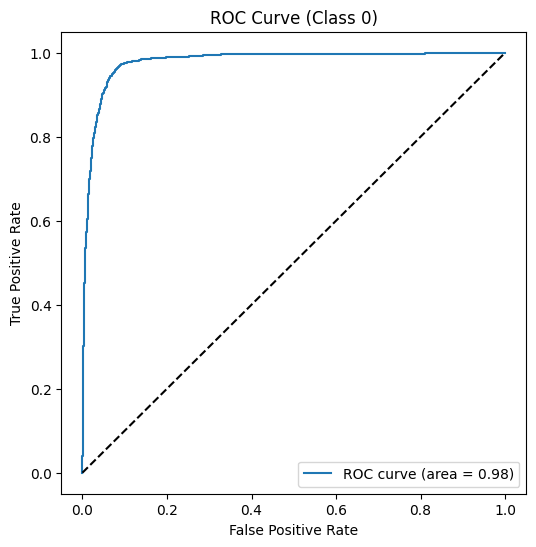

In [ ]:
# -------------------- 1. Import Libraries --------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import kagglehub

# -------------------- Download Fashion-MNIST using KaggleHub --------------------
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print("Path to dataset files:", path)

# The Kaggle dataset contains four .gz files.
# We will load the CSV versions if present OR convert the IDX files.

import os
train_csv = os.path.join(path, "fashion-mnist_train.csv")
test_csv = os.path.join(path, "fashion-mnist_test.csv")

# -------------------- Load Dataset --------------------
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Separate labels and features
y_train = train_df["label"].values
x_train = train_df.drop("label", axis=1).values

y_test = test_df["label"].values
x_test = test_df.drop("label", axis=1).values

# Reshape & Normalize
x_train = x_train.reshape(-1, 28, 28) / 255.0
x_test = x_test.reshape(-1, 28, 28) / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Smaller training subset
x_train_small, _, y_train_small, _ = train_test_split(
    x_train, y_train_cat, test_size=0.9, random_state=42
)

# -------------------- Activation Functions (Same as Before) --------------------
x = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)
softmax = np.exp(x) / np.sum(np.exp(x))

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1); plt.plot(x, sigmoid); plt.title("Sigmoid"); plt.grid()
plt.subplot(2, 2, 2); plt.plot(x, relu); plt.title("ReLU"); plt.grid()
plt.subplot(2, 2, 3); plt.plot(x, tanh); plt.title("Tanh"); plt.grid()
plt.subplot(2, 2, 4); plt.plot(x, softmax); plt.title("Softmax"); plt.grid()
plt.tight_layout(); plt.show()

# -------------------- Loss Functions --------------------
y_true = np.array([0, 0, 1, 1])
y_pred = np.linspace(0.01, 0.99, 100)

mse_loss = (y_true[2] - y_pred)**2
cross_entropy_loss = -(y_true[2] * np.log(y_pred) + (1 - y_true[2]) * np.log(1 - y_pred))

plt.figure(figsize=(8, 4))
plt.plot(y_pred, mse_loss, label="MSE")
plt.plot(y_pred, cross_entropy_loss, label="Cross-Entropy")
plt.title("Loss Functions")
plt.legend(); plt.grid(); plt.show()

# -------------------- Build Model --------------------
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# -------------------- Optimizer Comparison --------------------
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "SGD+Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001)
}

histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    model = build_model(opt)
    history = model.fit(
        x_train_small, y_train_small,
        validation_data=(x_test, y_test_cat),
        epochs=5, batch_size=128, verbose=1
    )
    histories[name] = (model, history)

# -------------------- Plot Accuracy & Loss --------------------
plt.figure(figsize=(12, 5))
for name, (_, history) in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12, 5))
for name, (_, history) in histories.items():
    plt.plot(history.history['val_loss'], label=f"{name} Val Loss")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend(); plt.grid(); plt.show()

# -------------------- Evaluate Final Model (Adam) --------------------
best_model = histories["Adam"][0]
y_pred_probs = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

fpr, tpr, _ = roc_curve(y_test_cat[:, 0], y_pred_probs[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Class 0)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
